# CMT309 - Data Science Portfolio Marks

### Loading Data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from urllib import request
module_url = f"https://drive.google.com/uc?export=view&id=1FIYiQZrMS9PmvKuwCoKFaa9IBiZ2t0tE"#10_mlqtCKFVY_maLVB8Bj8rXa0e3faSLs"
module_name = 'cmt309_coursework2_marks_overall.csv'
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))
df = pd.read_csv('cmt309_coursework2_marks_overall.csv')

Fetching https://drive.google.com/uc?export=view&id=1FIYiQZrMS9PmvKuwCoKFaa9IBiZ2t0tE


In [3]:
df.head(2)

,Number,P1.1,P1.2,P1.3,P2.1,P2.2.1,P2.2.2,P2.2.3,P2.2.4,P1 - Total,...,Overall,Proj. Overall,P1.1. - Comments,P1.2. - Comments,P1.3. - Comments,P2.1. - Comments,P2.2.1. - Comments,P2.2.2. - Comments,P2.2.3. - Comments,P2.2.4. - Comments
0,c0000000,10.0,12.0,8.0,11.00,9.00,5.0,10.0,5.00,30.0,...,70.00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c21066841,10.0,9.3,5.6,7.64,7.56,3.4,10.0,4.25,24.9,...,57.75,82.5,1.1. Well done,1.2. Good effort with non ideal coding.,A good try but word-count and peer-revewed ref...,2.1.4. xG calculations are not correct.,2.2.1. correct solution with non-ideal coding....,2.2.2. corect solution with non-ideal coding. ...,Well done.,Well done but ROC curves are uncessary.


## Personal Mark Visualisation

In [4]:
# Find your mark
your_number = 'c21099797' # replace the empty string with your number 'c00000000'
df[df['Number'] == your_number].iloc[:,0:13]


,Number,P1.1,P1.2,P1.3,P2.1,P2.2.1,P2.2.2,P2.2.3,P2.2.4,P1 - Total,P2 - Total,Overall,Proj. Overall
20,c21099797,8.28,6.0,5.0,4.6,4.02,3.3,5.4,4.25,19.28,21.57,40.85,58.36


In [5]:
#Visualise the comments for each sub-part
parts = ['P1.1.',	'P1.2.',	'P1.3.',	'P2.1.',	'P2.2.1.',	'P2.2.2.',	'P2.2.3.',	'P2.2.4.']
for i in parts:
    print('Comments for '+i+'-->'+df[df['Number'] == your_number].loc[:,i+' - Comments'].values[0])

Comments for P1.1.-->1.1. Well done
Comments for P1.2.-->1.2.3. and 1.2.4. use wrong logic.
Comments for P1.3.-->Good try but should have been supported with various references.
Comments for P2.1.-->2.1. all codes are non-ideal with many for loops and if statement usages. 2.1.1. values are float. 2.1.4. calculations are wrong
Comments for P2.2.1.-->2.2.1.2. not-allowed function usage
Comments for P2.2.2.-->2.2.2 good try with non-ideal coding.
Comments for P2.2.3.-->2.2.3..1 non-ideal coding. 2.2.3.2. fully wrong implementation.
Comments for P2.2.4.-->Well done but ROC curves are uncessary.


### Class-based Analysis

In [6]:
# Create a dataframe for overall class statistics
round(df.loc[:,'P1.1':].agg(['mean', 'median', 'std']), 2)

/var/folders/yd/h0ymdqrj7cx_l338617ljgpm0000gn/T/ipykernel_46665/4093606680.py:2: FutureWarning: ['P1.1. - Comments', 'P1.2. - Comments', 'P1.3. - Comments', 'P2.1. - Comments', 'P2.2.1. - Comments', 'P2.2.2. - Comments', 'P2.2.3. - Comments', 'P2.2.4. - Comments'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  round(df.loc[:,'P1.1':].agg(['mean', 'median', 'std']), 2)


,P1.1,P1.2,P1.3,P2.1,P2.2.1,P2.2.2,P2.2.3,P2.2.4,P1 - Total,P2 - Total,Overall,Proj. Overall
mean,7.03,7.91,5.25,7.02,3.39,2.00,6.34,2.96,20.19,21.71,41.89,59.85
median,7.36,8.38,5.00,7.38,1.80,2.08,7.00,3.50,21.08,22.34,43.10,61.58
std,2.04,2.57,2.12,2.48,2.75,1.53,3.19,1.76,5.49,9.53,13.71,19.59


In [7]:
# Distribution of studens based on Mark
d = {'Fail':[0, 50], 'Pass':[50, 60], 'Merit':[60, 70], 'Distinction':[70, 100.1]}
perf = pd.DataFrame({'Mark':['Fail', 'Pass', 'Merit', 'Distinction']})
perf['Num Students'] = 0
for key, value in d.items():
    perf.loc[perf['Mark'] == key,'Num Students'] = df[(df['Proj. Overall']>=value[0])*(df['Proj. Overall']<value[1])]['Proj. Overall'].agg(['count']).values[0]
perf['Percentage'] = round(100*perf['Num Students']/perf['Num Students'].sum(), 2)
perf

,Mark,Num Students,Percentage
0,Fail,62,28.70
1,Pass,39,18.06
2,Merit,45,20.83
3,Distinction,70,32.41


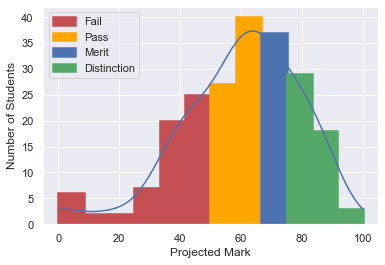

In [8]:
# Plot a histogram for total marks
sns.set(color_codes=True)
ax = sns.histplot(data=df, x="Proj. Overall", linewidth=2.5, kde=True)
for p in ax.patches:
    if p.get_x() < 50:
        p.set_color('r')
        p.set_label('Fail')
    elif p.get_x() < 60:
        p.set_color('orange')
        p.set_label('Pass')
    elif p.get_x() < 70:
        p.set_color('b')
        p.set_label('Merit')
    else:
        p.set_color('g')
        p.set_label('Distinction')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.set_xlabel('Projected Mark')#
ax.set_ylabel('Number of Students')
plt.legend(by_label.values(), by_label.keys())   

In [9]:
# Distribution of marks for each Part of the Portfolio
fig = px.histogram(df.iloc[1:,:], x=["P1 - Total", "P2 - Total"], 
                   width=600, height=500)
fig.update_layout(
    title="Distribution of Marks",
    yaxis_title="Number of Students",
    xaxis_title="Mark",
    legend_title="Question",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)
fig.show()

In [10]:
# Boxplot for each sub-part of questions
px.box(df, x=['P1.1',	'P1.2',	'P1.3',	'P2.1',	'P2.2.1',	'P2.2.2',	'P2.2.3',	'P2.2.4'], width=600, height=500, 
       labels={'value':'Mark for question', 'variable':'Question'}, template="simple_white", points="all")